<a href="https://colab.research.google.com/github/hugofelix8282/DataScience/blob/main/Modelo_Hepatite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Banco de dados de diabetes dos índios Pima**
# Preveja o aparecimento de diabetes com base em medidas de diagnóstico

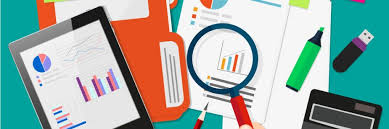

O projeto tem o objetivo de criar um modelo machine Learning para prever  com diagnóstico se um paciente tem diabetes ou não. Usando a base de dados disponível pelo Kaggle no link: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data.  O conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais e todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.

Processos do projeto: 

Analise Exploratório dos dados;

Escolha do algoritmo;

Treinamento de modelo;

Avaliação do modelo;



O projeto foi desenvolvido no ambiente Google Colaboratory, no qual fornece todos os recursos necessários para desenvolvimento de modelos de aprendizagem machine Learning. Logo,  primeiro passo é importar todas as bibliotecas necessárias. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
import seaborn as sns
sns.set(style = "darkgrid")
sns.set(style = "dark")



# **Exploração dos Dados**

É usado a biblioteca pandas para importação do arquivo CSV, assim, terá recursos para detalhar as variáveis contidas no dataset.

In [2]:
data = pd.read_csv('/content/pima-data.csv')
data= data.copy()
data



,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


Com a função value_counts é visualizado a contagem de valores únicos dos elementos.  

In [3]:
# soma dos valores
data.value_counts()

num_preg  glucose_conc  diastolic_bp  thickness  insulin  bmi   diab_pred  age  skin    diabetes
17        163           72            41         114      40.9  0.817      47   1.6154  True        1
15        136           70            32         110      37.1  0.153      43   1.2608  True        1
2         87            58            16         52       32.7  0.166      25   0.6304  False       1
                        0             23         0        28.9  0.773      25   0.9062  False       1
          85            65            0          0        39.6  0.930      27   0.0000  False       1
                                                                                                   ..
5         106           82            30         0        39.5  0.286      38   1.1820  False       1
          105           72            29         325      36.9  0.159      28   1.1426  False       1
          104           74            0          0        28.8  0.153      48   0.0000 

Logo, usaremos a função isnull verificar se existe valores nulos (missing) no dataset.

In [4]:
# verificar os valores nulos
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

A função describe() faz um resumo estatisco sobre cada variável do dataset, onde poderemos observar  a média, desvio padrão, Quartil, mínimo e máximo de cada coluna.

In [5]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809135
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


Em uma análise exploratória de dados temos que verificar a correlação de pares de colunas, excluindo NA / valores nulos de cada variável. 

In [10]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
corr =data.corr()
corr

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


Para uma melhor análise sobre correlação, é interessante uma análise gráfica, onde habilitei a biblioteca de visualização Seaborn, no qual acredito que seja a mais completa e simples  para visualzação de dados.

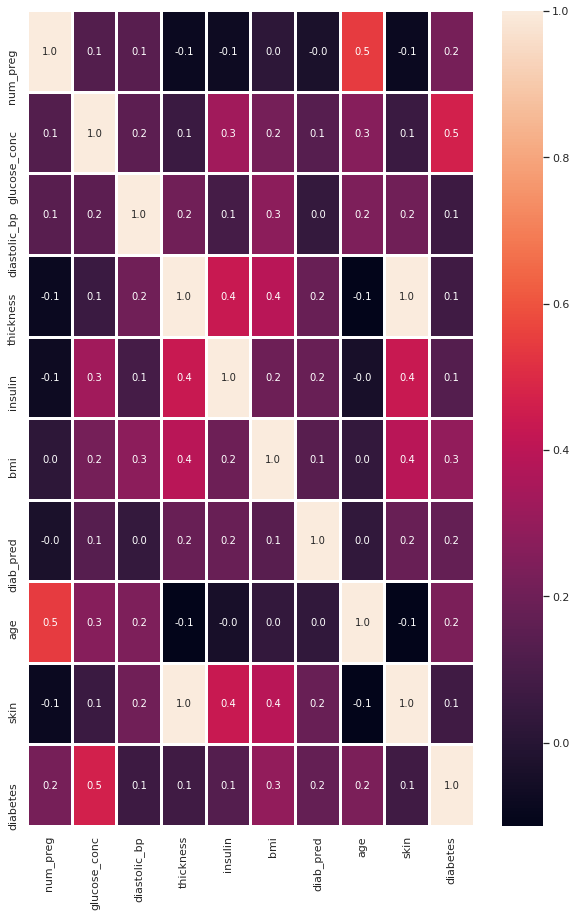

In [11]:
# Gráfico de correlação
fig, tam = plt.subplots(figsize=(10,15))
sns.heatmap(corr, annot= True,linewidths=2, ax=tam, fmt='.1f')


Uma vez explorado os dados, é visto que a  coluna 'diabetes' que será o nosso objetivo alvo de saída para definir se o paciente tem ou não diabetes, contém dados sem ser númericos. Lembrando que no modelo de aprendizagem  machine learning não  é aceito dados não númericos, logo, teremos que tratar tal variável. Como a variável apresenta dados categóricos (True e False), iremos substituí-los por 1 (True) e 0 (False), usando a função map() para mapeamento.

In [12]:
# tratamento para dados Categóricos
diabetes = {True:1 , False:0}
data.diabetes = data.diabetes.map(diabetes)
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1


Visalização gráfica de cada idade apresentada no dataset sobre a quantidade de positivos e negativos.


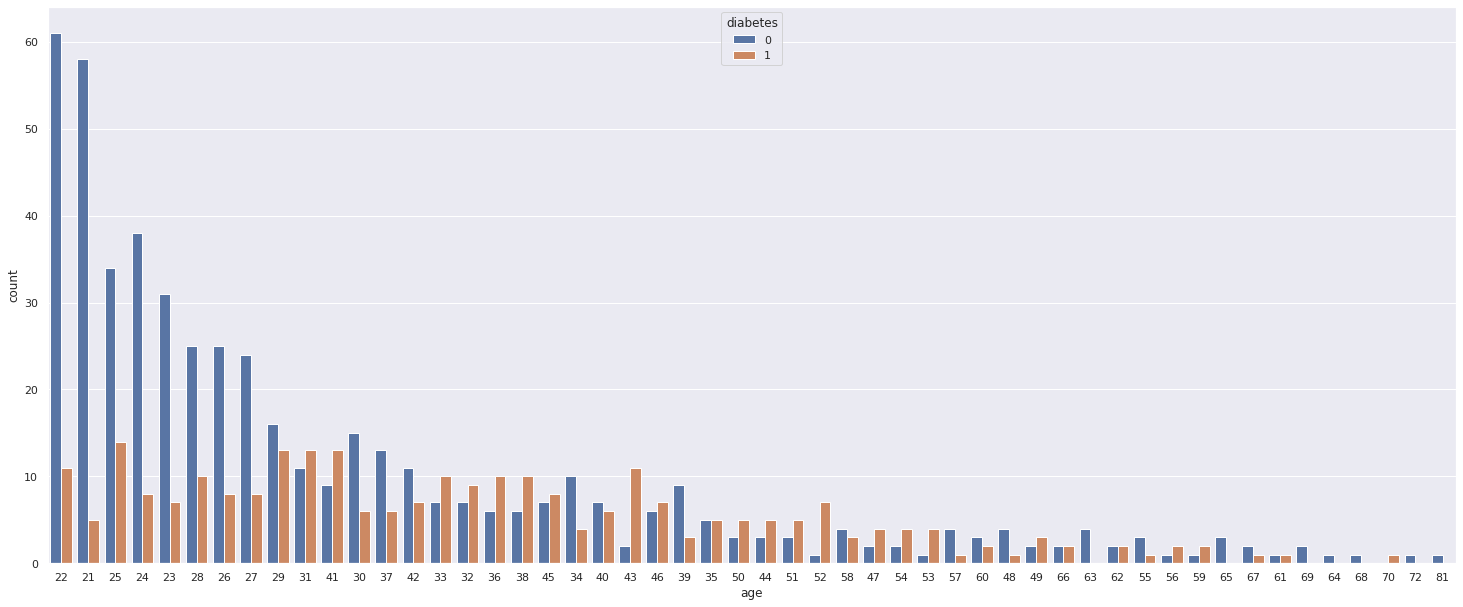

In [ ]:
a= data.age.value_counts().sort_values(ascending= False).index
g= sns.countplot(x= 'age', order=a, data=data, hue= 'diabetes')
sns.set(rc={'figure.figsize': (25.24, 10.24)})


Analisando a contagem  de  dados positivos e negativos do dataset,  é possível observar que  resultados negativos para diabetes contemplam 65% da base total de dados. Onde para uma  melhor aprendizagem do modelo seria interessante um equilíbrio.

In [ ]:
# valores de positivo e negativos
positivo = len(data.loc[data.diabetes ==  True])
negativo=len(data.loc[data.diabetes == False])
P = positivo/(positivo + negativo) *100
N= negativo/ (negativo + positivo)*100
print('casos positivos :', positivo , '% 2.f' % P,'%')
print('Casos Negativos :' , negativo , '% 2.f' % N,'%')


casos positivos : 268  35 %
Casos Negativos : 500  65 %


Visualizando os resultados de positivos e negativo com o searborn, veja que em duas linhas de código é possível aplicar uma visualização sobre contagens de dados categóricos do dataset apresentado.

---



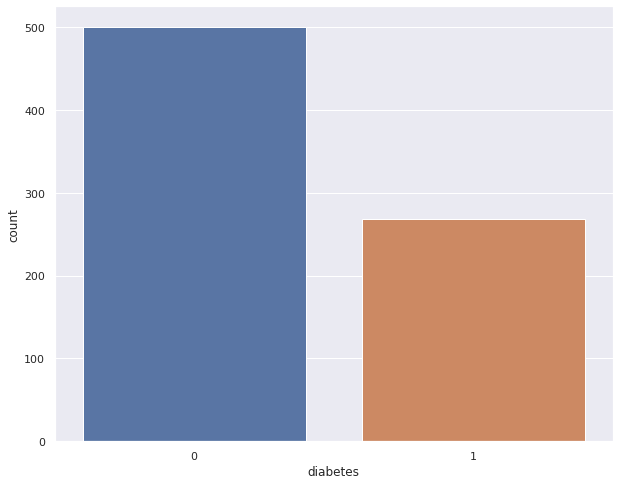

In [13]:
sns.set(rc={'figure.figsize': (10,8)})
sns.countplot(x= data['diabetes'], data=data)


# **Preparando o modelo :**

Agora chegou a hora de preparar os dados para treinamento, após a exploração realizada, o cientista de dados será habilitado a  identificar quais atributos (colunas) são mais relevantes para serem atribuídos ao treinamento do modelo, que terá como alvo (predição) a variável 'diabetes', ou seja, o nosso modelo terá  uma apredizagem de classificação supervisionada.

In [14]:
# Realização da divisão do dados em 'x' para atributos e 'y' para o ponto alvo dos resultados, o chamado target.
target= data[['diabetes']]
atributos= data[['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']]
x= atributos.values
y= target.values


Existem várias técnicas para realizar a divisão dos dados para treinamento e teste, porém, com a função train_test_split() da biblioteca scikit-learn, a divisão é realizada sem problemas, onde as passagem dos paramêtro definem a forma de como deseja a divisão. 

In [15]:
# dividindo o modelo em treino e teste
split_test_size  = 0.30
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=split_test_size, random_state =42 )


In [16]:
# verificando o resultado da divisão aplicada.

print('dados de treino', len(x_treino),  '<>', len(x_treino)/ len(data.index)*100,'%')
print('dados de teste', len(x_teste), '<>',len(x_teste)/len(data.index)*100 , '%' )

dados de treino 537 <> 69.921875 %
dados de teste 231 <> 30.078125 %


Na fase de exploração de dados, foi analisado existência ou não de valores nulos em nosso dataset, porém, não aplicamos a análise de missing ocultos, que são valores que não são preenchidos de forma correta, em nosso dataset iremos análisar os dados zerados. Lembrando se caso não seja tratado  podem ser um problema para os resultados do modelo. 

In [ ]:
# tratando dados missing (Verificando se existem dados nulos)
data.isnull().sum().sort_values(ascending= True)




num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [ ]:
# verificando se existem dados preenchidos com zero.

print('Age :',len(data.loc[data.age == 0]))
print('num_preg:',len(data.loc[ data.num_preg == 0]))
print('glucose_conc :', len(data.loc[data.glucose_conc==0]))
print('diastolic_bp :', len(data.loc[data.diastolic_bp == 0]))
print('thickness :', len(data.loc[data.thickness == 0]))
print('insulin :', len(data.loc[data.insulin == 0]))
print('bmi :', len(data.loc[data.bmi == 0]))









Age : 0
num_preg: 111
glucose_conc : 5
diastolic_bp : 35
thickness : 227
insulin : 374
bmi : 11


Existem vários métodos para tratamento de missing ocultos, porém, para este projeto escolhi o que irá atribuir os valores mais frequentes de cada variável. Neste caso, foi usado a biblioteca Impute do scikit-learn. Para mais detalhas sobre tal biblioteca deixo o link abaixo: 

https://bit.ly/3oPMDCD

In [18]:
from sklearn.impute import SimpleImputer
subs = SimpleImputer(missing_values= 0 , strategy='most_frequent') 
x_treino = subs.fit_transform(x_treino)
x_teste = subs.fit_transform(x_teste)

# **Criando o Modelo**

Após todo tratamento dos dados, é hora de criar o modelo de aprendizagem. No qual para o projeto será aplicado o algoritmo de Naive Bayes, que nada mais é que um classificador de probabilidade. Onde usando a função GaussianNB a probabilidade dos recursos é assumida como gaussiana.



In [21]:
from sklearn.naive_bayes import GaussianNB
# instância o objeto a função preditora.
modelo1 = GaussianNB()
# treina o modelo
modelo1.fit(x_treino, y_treino.ravel())   # ravel usado para ajustar o shape[]


GaussianNB(priors=None, var_smoothing=1e-09)

# **Treinando e Testando o  Modelo**

Com o nosso modelo pronto, é hora de verificar a métrica do nosso treinamento e teste, onde para isso, irei utilizar a função metrics do sklearn. Assim, poderemos avaliar a acurácia do modelo desenvolvido.

In [24]:
from sklearn import metrics
predicao_treino =modelo1.predict(x_treino)
print('A acurácia de treino de meu modelo foi: ', metrics.accuracy_score(y_treino, predicao_treino),'%') # Como passagem de paramêtro com a função metrics.accuracy_score é passado o que será avaliado, com o que foi treinado

A acurácia de treino de meu modelo foi:  0.750465549348231 %


In [25]:
# testando o modelo 
predicao_teste= modelo1.predict(x_teste)
print('A acurácia de treino de meu modelo foi:', metrics.accuracy_score(y_teste,predicao_teste), '%') 


A acurácia de treino de meu modelo foi: 0.7402597402597403 %


# **Tabela de confusão**

Por fim, é aplicado a chamada tabela de confusão para analisar com mais detalhe o quanto o  modelo obteve em seu desempenho. Observe que a saída da matriz é apresentado que no total de 231 avaliações de teste, o modelo desenvolvido obteve um acerto de 170 avaliações, ou seja, 74% de acurácia.

In [ ]:
# tabela de confusão 
print(metrics.confusion_matrix(y_teste,predicao_teste, labels= [1,0] )) 

[[ 52  28]
 [ 33 118]]


Observe que a função metrics.classification_report irá retorna todos os resultados da amostragem aplicada ao modelo. 

In [ ]:
print(metrics.classification_report(y_teste,predicao_teste, labels= [1,0]))

              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

